In [1]:
%matplotlib notebook
import spikeextractors as se
import spiketoolkit as st
import spikewidgets as sw
import spyica

In [2]:
rec = se.MEArecRecordingExtractor('/home/alessio/Documents/Codes/mea_project/MEArec/data/recordings/recordings_20cells_Neuronexus-32_30.0_10.0uV_16-06-2019:20:24.h5')
sort_gt = se.MEArecSortingExtractor('/home/alessio/Documents/Codes/mea_project/MEArec/data/recordings/recordings_20cells_Neuronexus-32_30.0_10.0uV_16-06-2019:20:24.h5')

Could not load plane information. Assuming probe is in yz plane


In [19]:
sort_ica = spyica.ica_spike_sorting(rec, features='amp', keep_all_clusters=True)

Applying FastICA algorithm
FastICA completed in:  50.34093236923218
Number of cleaned sources:  10
Clustering Sources with:  mog
Number of spike trains after clustering:  21
Found duplicate spike trains:  6 11 130
Found duplicate spike trains:  7 15 85
Found duplicate spike trains:  8 15 131
Found duplicate spike trains:  13 5 80
Found duplicate spike trains:  16 17 296
Found duplicate spike trains:  18 16 134
Number of spike trains after duplicate rejection:  15
Elapsed time:  122.14029693603516


In [22]:
sort_ms = st.sorters.run_klusta(rec, adjacency_radius=100, debug=True)

'group' property is not available and it will not be saved.
Running Klusta
klusta /home/alessio/Documents/Codes/spike_sorting/spyica/tmp_klusta/config.prm --overwrite
23:09:16 [I] creator:446          Using kwik file `/home/alessio/Documents/Codes/spike_sorting/spyica/tmp_klusta/recording.kwik`.

23:09:16 [I] launch:206           Starting spike detection.

23:09:16 [I] launch:53            SpikeDetekt parameters:

23:09:16 [I] launch:55            chunk_overlap_seconds = 0.015

23:09:16 [I] launch:55            chunk_size_seconds = 3

23:09:16 [I] launch:55            connected_component_join_size = 1

23:09:16 [I] launch:55            detect_spikes = negative

23:09:16 [I] launch:55            dtype = int16

23:09:16 [I] launch:55            excerpt_size_seconds = 1

23:09:16 [I] launch:55            experiment_name = recording.kwik

23:09:16 [I] launch:55            extract_s_after = 32

23:09:16 [I] launch:55            extract_s_before = 16

23:09:16 [I] launch:55            filter

In [20]:
sc_ica = st.comparison.compare_sorter_to_ground_truth(sort_gt, sort_ica)
sc_ica.get_performance('pooled_with_average')

accuracy                  0.331646
recall                    0.366167
precision                 0.895765
false_discovery_rate      0.104235
miss_rate                 0.633714
misclassification_rate    0.001486
dtype: float64

In [23]:
sc_ms = st.comparison.compare_sorter_to_ground_truth(sort_gt, sort_ms)
sc_ms.get_performance('pooled_with_average')

accuracy                  0.438091
recall                    0.440882
precision                 0.988397
false_discovery_rate      0.011603
miss_rate                 0.557371
misclassification_rate    0.007458
dtype: float64

<IPython.core.display.Javascript object>


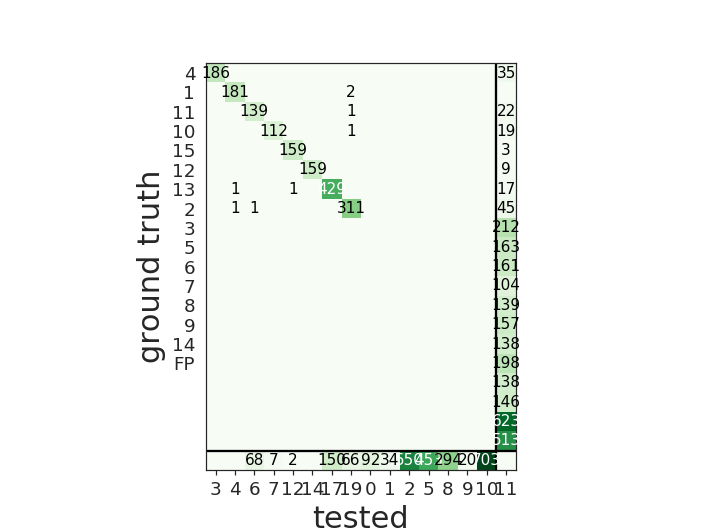

In [21]:
sw.plot_confusion_matrix(sc_ica)

<IPython.core.display.Javascript object>


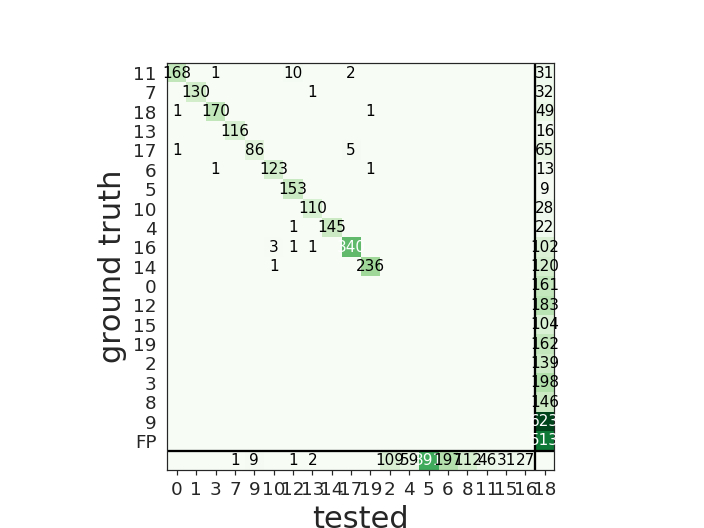

In [24]:
sw.plot_confusion_matrix(sc_ms)

<IPython.core.display.Javascript object>


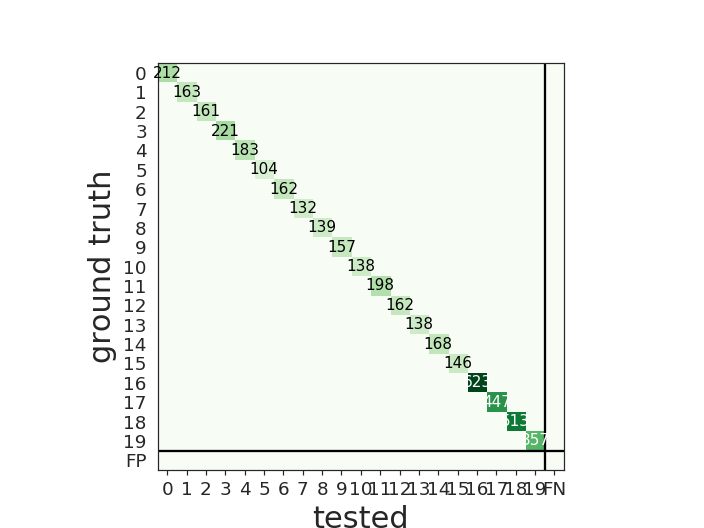

In [25]:
sc_gt = st.comparison.compare_sorter_to_ground_truth(sort_gt, sort_gt)
sw.plot_confusion_matrix(sc_gt)
